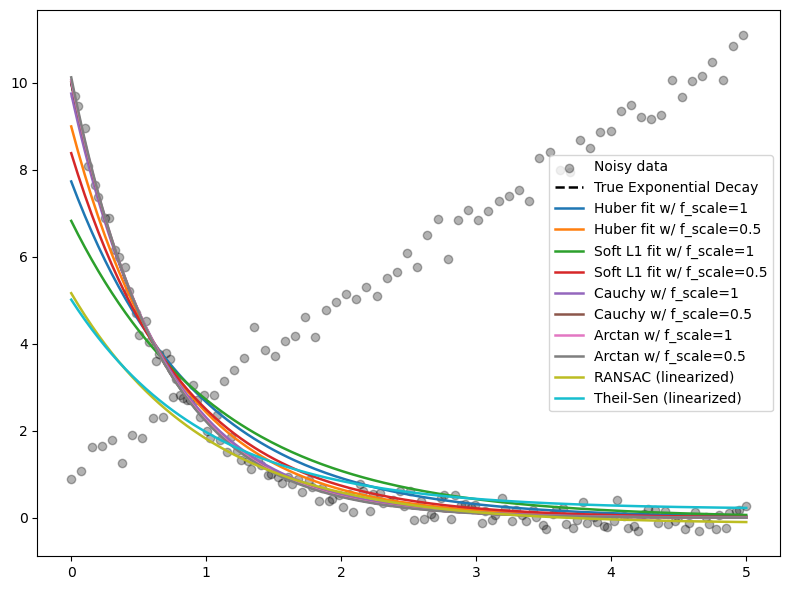

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor

# -------------------------------
# 1. 데이터 생성
# -------------------------------
np.random.seed(0)
x = np.linspace(0, 5, 200)
y_true = 10 * np.exp(-1.5 * x)
y = y_true + np.random.normal(0, 0.2, size=x.shape)

# 선형 이상치 추가 (10개마다)
outlier_idx = np.arange(0, 200, 3)
y[outlier_idx] = 2 * x[outlier_idx] + 1 + np.random.normal(0, 0.3, size=outlier_idx.shape)

# -------------------------------
# 2. 잔차 함수 정의
# -------------------------------
def residuals(params, x, y):
    a, b = params
    return y - a * np.exp(-b * x)

# -------------------------------
# 3. Huber Loss
# -------------------------------
res_huber = least_squares(residuals, x0=[1, 1], args=(x, y), loss='huber', f_scale=1)
y_huber = res_huber.x[0] * np.exp(-res_huber.x[1] * x)

# -------------------------------
# 3. Huber Loss f scale=0.5
# -------------------------------
res_huber1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='huber', f_scale=0.5)
y_huber1 = res_huber1.x[0] * np.exp(-res_huber1.x[1] * x)

# -------------------------------
# 4. Soft L1 Loss
# -------------------------------
res_softl1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='soft_l1', f_scale=1)
y_softl1 = res_softl1.x[0] * np.exp(-res_softl1.x[1] * x)

# -------------------------------
# 4. Soft L1 Loss f scale=0.5
# -------------------------------
res_softl1_1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='soft_l1', f_scale=0.5)
y_softl1_1 = res_softl1_1.x[0] * np.exp(-res_softl1_1.x[1] * x)


# -------------------------------
# 5. Cauchy f scale=1
# -------------------------------
res_cauchy = least_squares(residuals, x0=[1, 1], args=(x, y), loss='cauchy', f_scale=1)
y_cauchy = res_cauchy.x[0] * np.exp(-res_cauchy.x[1] * x)

# -------------------------------
# 5. Cauchy f scale=0.5
# -------------------------------
res_cauchy1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='cauchy', f_scale=0.5)
y_cauchy1 = res_cauchy1.x[0] * np.exp(-res_cauchy1.x[1] * x)

# -------------------------------
# 6. Arctan f scale=1
# -------------------------------
res_arctan = least_squares(residuals, x0=[1, 1], args=(x, y), loss='arctan', f_scale=1)
y_arctan = res_arctan.x[0] * np.exp(-res_arctan.x[1] * x)

# -------------------------------
# 6. Arctan f scale=0.5
# -------------------------------
res_arctan1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='arctan', f_scale=0.5)
y_arctan1 = res_arctan1.x[0] * np.exp(-res_arctan1.x[1] * x)

# -------------------------------
# 7. RANSAC (선형화)
# -------------------------------
x_lin = np.exp(-x).reshape(-1, 1)
model_ransac = RANSACRegressor(estimator=LinearRegression(), residual_threshold=0.5, random_state=0)
model_ransac.fit(x_lin, y)
y_ransac = model_ransac.predict(x_lin)

# -------------------------------
# 8. Theil-Sen (선형화)
# -------------------------------
model_theil = TheilSenRegressor()
model_theil.fit(x_lin, y)
y_theil = model_theil.predict(x_lin)

# -------------------------------
# 7. 시각화
# -------------------------------
fig, axs = plt.subplots(figsize=(8, 6))

colors = plt.cm.tab10.colors  # 20가지 구분 가능한 색상

ys = np.array([y_huber, y_huber1
               , y_softl1, y_softl1_1
               , y_cauchy, y_cauchy1
               , y_arctan, y_arctan1
               , y_ransac, y_theil])
labels = np.array(['Huber fit w/ f_scale=1', 'Huber fit w/ f_scale=0.5'
                   , 'Soft L1 fit w/ f_scale=1', 'Soft L1 fit w/ f_scale=0.5'
                   , 'Cauchy w/ f_scale=1', 'Cauchy w/ f_scale=0.5'
                   , 'Arctan w/ f_scale=1', 'Arctan w/ f_scale=0.5'
                   , 'RANSAC (linearized)', 'Theil-Sen (linearized)'])
# 원본 데이터
axs.scatter(x, y, alpha=0.3, label='Noisy data', color='k')
axs.plot(x, y_true, lw=1.8, color='k', label='True Exponential Decay', ls='--')

for n, i in enumerate(labels):
    axs.plot(x, ys[n], lw=1.8, color=colors[n], label=labels[n])

plt.legend()
plt.tight_layout()
plt.show()


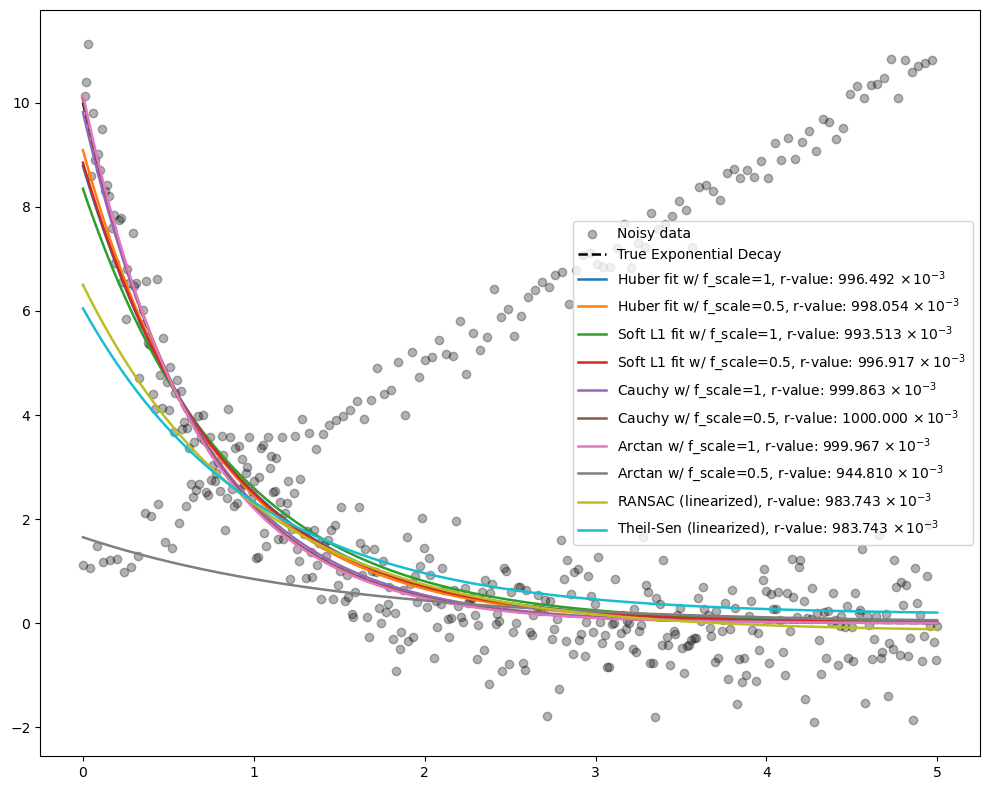

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
from scipy import stats

x_min = 0
x_max = 5
n_x = 500
# -------------------------------
# 1. 데이터 생성
# -------------------------------
np.random.seed(0)
x = np.linspace(x_min, x_max, n_x)
y_true = 10 * np.exp(-1.5 * x)
y = y_true + np.random.normal(0, 0.7, size=x.shape)

# 선형 이상치 추가 (n 마다)
m = 4
outlier_idx = np.arange(0, n_x, m)
y[outlier_idx] = 2 * x[outlier_idx] + 1 + np.random.normal(0, 0.3, size=outlier_idx.shape)

# -------------------------------
# 2. 잔차 함수 정의
# -------------------------------
def residuals(params, x, y):
    a, b = params
    return y - a * np.exp(-b * x)

# -------------------------------
# 3. Huber Loss
# -------------------------------
res_huber = least_squares(residuals, x0=[1, 1], args=(x, y), loss='huber', f_scale=1)
y_huber = res_huber.x[0] * np.exp(-res_huber.x[1] * x)

# -------------------------------
# 3. Huber Loss f scale=0.5
# -------------------------------
res_huber1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='huber', f_scale=0.5)
y_huber1 = res_huber1.x[0] * np.exp(-res_huber1.x[1] * x)

# -------------------------------
# 4. Soft L1 Loss
# -------------------------------
res_softl1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='soft_l1', f_scale=1)
y_softl1 = res_softl1.x[0] * np.exp(-res_softl1.x[1] * x)

# -------------------------------
# 4. Soft L1 Loss f scale=0.5
# -------------------------------
res_softl1_1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='soft_l1', f_scale=0.5)
y_softl1_1 = res_softl1_1.x[0] * np.exp(-res_softl1_1.x[1] * x)


# -------------------------------
# 5. Cauchy f scale=1
# -------------------------------
res_cauchy = least_squares(residuals, x0=[1, 1], args=(x, y), loss='cauchy', f_scale=1)
y_cauchy = res_cauchy.x[0] * np.exp(-res_cauchy.x[1] * x)

# -------------------------------
# 5. Cauchy f scale=0.5
# -------------------------------
res_cauchy1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='cauchy', f_scale=0.5)
y_cauchy1 = res_cauchy1.x[0] * np.exp(-res_cauchy1.x[1] * x)

# -------------------------------
# 6. Arctan f scale=1
# -------------------------------
res_arctan = least_squares(residuals, x0=[1, 1], args=(x, y), loss='arctan', f_scale=1)
y_arctan = res_arctan.x[0] * np.exp(-res_arctan.x[1] * x)

# -------------------------------
# 6. Arctan f scale=0.5
# -------------------------------
res_arctan1 = least_squares(residuals, x0=[1, 1], args=(x, y), loss='arctan', f_scale=0.5)
y_arctan1 = res_arctan1.x[0] * np.exp(-res_arctan1.x[1] * x)

# -------------------------------
# 7. RANSAC (선형화)
# -------------------------------
x_lin = np.exp(-x).reshape(-1, 1)
model_ransac = RANSACRegressor(estimator=LinearRegression(), residual_threshold=0.5, random_state=0)
model_ransac.fit(x_lin, y)
y_ransac = model_ransac.predict(x_lin)

# -------------------------------
# 8. Theil-Sen (선형화)
# -------------------------------
model_theil = TheilSenRegressor()
model_theil.fit(x_lin, y)
y_theil = model_theil.predict(x_lin)

# -------------------------------
# 7. 시각화
# -------------------------------
fig, axs = plt.subplots(figsize=(10, 8))

colors = plt.cm.tab10.colors  # 20가지 구분 가능한 색상

ys = np.array([y_huber, y_huber1
               , y_softl1, y_softl1_1
               , y_cauchy, y_cauchy1
               , y_arctan, y_arctan1
               , y_ransac, y_theil])

rvalues = np.array([])
for n, i in enumerate(ys):
    res = stats.pearsonr(y_true, i)
    rvalues = np.append(rvalues, res.statistic)
    
labels = np.array(['Huber fit w/ f_scale=1', 'Huber fit w/ f_scale=0.5'
                   , 'Soft L1 fit w/ f_scale=1', 'Soft L1 fit w/ f_scale=0.5'
                   , 'Cauchy w/ f_scale=1', 'Cauchy w/ f_scale=0.5'
                   , 'Arctan w/ f_scale=1', 'Arctan w/ f_scale=0.5'
                   , 'RANSAC (linearized)', 'Theil-Sen (linearized)'])
# 원본 데이터
axs.scatter(x, y, alpha=0.3, label='Noisy data', color='k')
axs.plot(x, y_true, lw=1.8, color='k', label='True Exponential Decay', ls='--')

for n, i in enumerate(labels):
    axs.plot(x, ys[n], lw=1.8, color=colors[n], label=labels[n]+', r-value: {0:0.3f}'.format(rvalues[n]*10e2)+r' $\times\,10^{-3}$ ')

plt.legend()
plt.tight_layout()
plt.show()


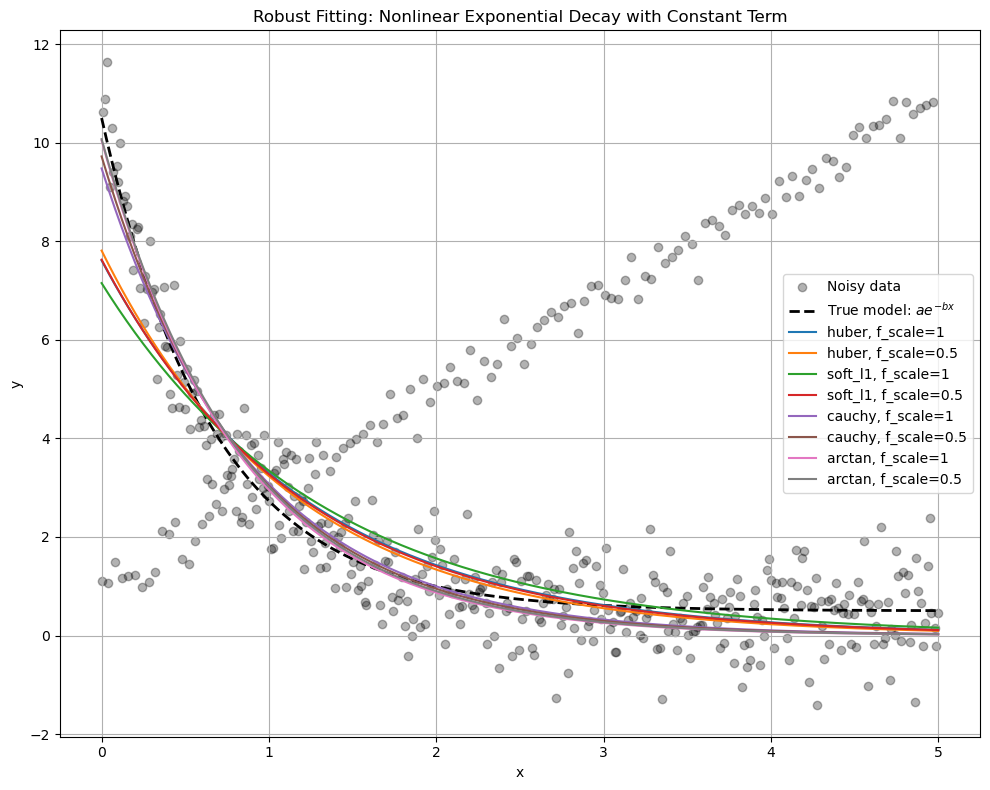

         Loss & f_scale        a       b
0      huber, f_scale=1   7.6105  0.8364
1    huber, f_scale=0.5   7.8104  0.8819
2    soft_l1, f_scale=1   7.1507  0.7596
3  soft_l1, f_scale=0.5   7.6264  0.8462
4     cauchy, f_scale=1   9.4776  1.1258
5   cauchy, f_scale=0.5   9.7207  1.1634
6     arctan, f_scale=1  10.0464  1.2232
7   arctan, f_scale=0.5  10.0718  1.2069


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pandas as pd

# 데이터 생성
x_min, x_max, n_x = 0, 5, 500
np.random.seed(0)
x = np.linspace(x_min, x_max, n_x)
y_true = 10 * np.exp(-1.5 * x) + 0.5
y = y_true + np.random.normal(0, 0.7, size=x.shape)

# 선형 이상치 추가
m = 4
outlier_idx = np.arange(0, n_x, m)
y[outlier_idx] = 2 * x[outlier_idx] + 1 + np.random.normal(0, 0.3, size=outlier_idx.shape)

# 잔차 함수 (비선형 모델)
def residuals_nonlinear(params, x, y):
    a, b = params
    return y - (a * np.exp(-b * x))

# loss + f_scale 조합
loss_settings = [
    ('huber', 1), ('huber', 0.5),
    ('soft_l1', 1), ('oft_l1', 0.5),
    ('cauchy', 1), ('cauchy', 0.5),
    ('arctan', 1), ('arctan', 0.5)
]

results = {}
params_dict = {}

for loss, fscale in loss_settings:
    label = f"{loss}, f_scale={fscale}"
    res = least_squares(residuals_nonlinear, x0=[1, 1], args=(x, y), loss=loss, f_scale=fscale)
    y_fit = res.x[0] * np.exp(-res.x[1] * x)
    results[label] = y_fit
    params_dict[label] = res.x

# 시각화
fig, axs = plt.subplots(figsize=(10, 8))
axs.scatter(x, y, alpha=0.3, label='Noisy data', color='k')
plt.plot(x, y_true, 'k--', label='True model: $ae^{-bx}$', linewidth=2)

colors = plt.cm.tab10.colors
for i, (label, y_fit) in enumerate(results.items()):
    plt.plot(x, y_fit, label=label, color=colors[i % len(colors)])

plt.title('Robust Fitting: Nonlinear Exponential Decay with Constant Term')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 파라미터 테이블 출력
df_params = pd.DataFrame(params_dict, index=["a", "b"]).T
df_params = df_params.reset_index().rename(columns={"index": "Loss & f_scale"})
print(df_params.round(4))


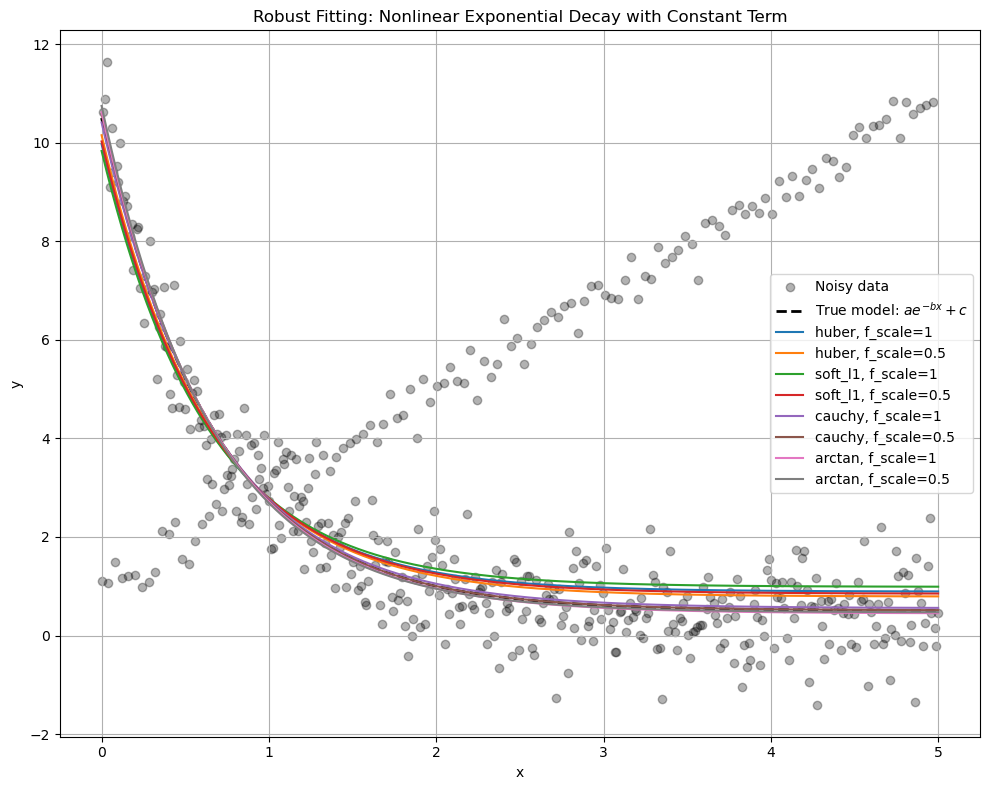

         Loss & f_scale        a       b       c
0      huber, f_scale=1   9.0776  1.5743  0.8913
1    huber, f_scale=0.5   9.3609  1.5521  0.7904
2    soft_l1, f_scale=1   8.8433  1.5922  0.9881
3  soft_l1, f_scale=0.5   9.1770  1.5576  0.8484
4     cauchy, f_scale=1   9.8541  1.4956  0.5556
5   cauchy, f_scale=0.5  10.0747  1.5094  0.5099
6     arctan, f_scale=1  10.1726  1.5009  0.4482
7   arctan, f_scale=0.5  10.2770  1.5324  0.4688


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pandas as pd

# 데이터 생성
x_min, x_max, n_x = 0, 5, 500
np.random.seed(0)
x = np.linspace(x_min, x_max, n_x)
y_true = 10 * np.exp(-1.5 * x) + 0.5
y = y_true + np.random.normal(0, 0.7, size=x.shape)

# 선형 이상치 추가
m = 4
outlier_idx = np.arange(0, n_x, m)
y[outlier_idx] = 2 * x[outlier_idx] + 1 + np.random.normal(0, 0.3, size=outlier_idx.shape)

# 잔차 함수 (비선형 모델)
def residuals_nonlinear(params, x, y):
    a, b, c = params
    return y - (a * np.exp(-b * x) + c)

# loss + f_scale 조합
loss_settings = [
    ('huber', 1), ('huber', 0.5),
    ('soft_l1', 1), ('soft_l1', 0.5),
    ('cauchy', 1), ('cauchy', 0.5),
    ('arctan', 1), ('arctan', 0.5)
]

results = {}
params_dict = {}

for loss, fscale in loss_settings:
    label = f"{loss}, f_scale={fscale}"
    res = least_squares(residuals_nonlinear, x0=[1, 1, 0], args=(x, y), loss=loss, f_scale=fscale)
    y_fit = res.x[0] * np.exp(-res.x[1] * x) + res.x[2]
    results[label] = y_fit
    params_dict[label] = res.x

# 시각화
fig, axs = plt.subplots(figsize=(10, 8))
axs.scatter(x, y, alpha=0.3, label='Noisy data', color='k')
plt.plot(x, y_true, 'k--', label='True model: $ae^{-bx} + c$', linewidth=2)

colors = plt.cm.tab10.colors
for i, (label, y_fit) in enumerate(results.items()):
    plt.plot(x, y_fit, label=label, color=colors[i % len(colors)])

plt.title('Robust Fitting: Nonlinear Exponential Decay with Constant Term')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 파라미터 테이블 출력
df_params = pd.DataFrame(params_dict, index=["a", "b", "c"]).T
df_params = df_params.reset_index().rename(columns={"index": "Loss & f_scale"})
print(df_params.round(4))
